# Salary prediction using Decision Tree

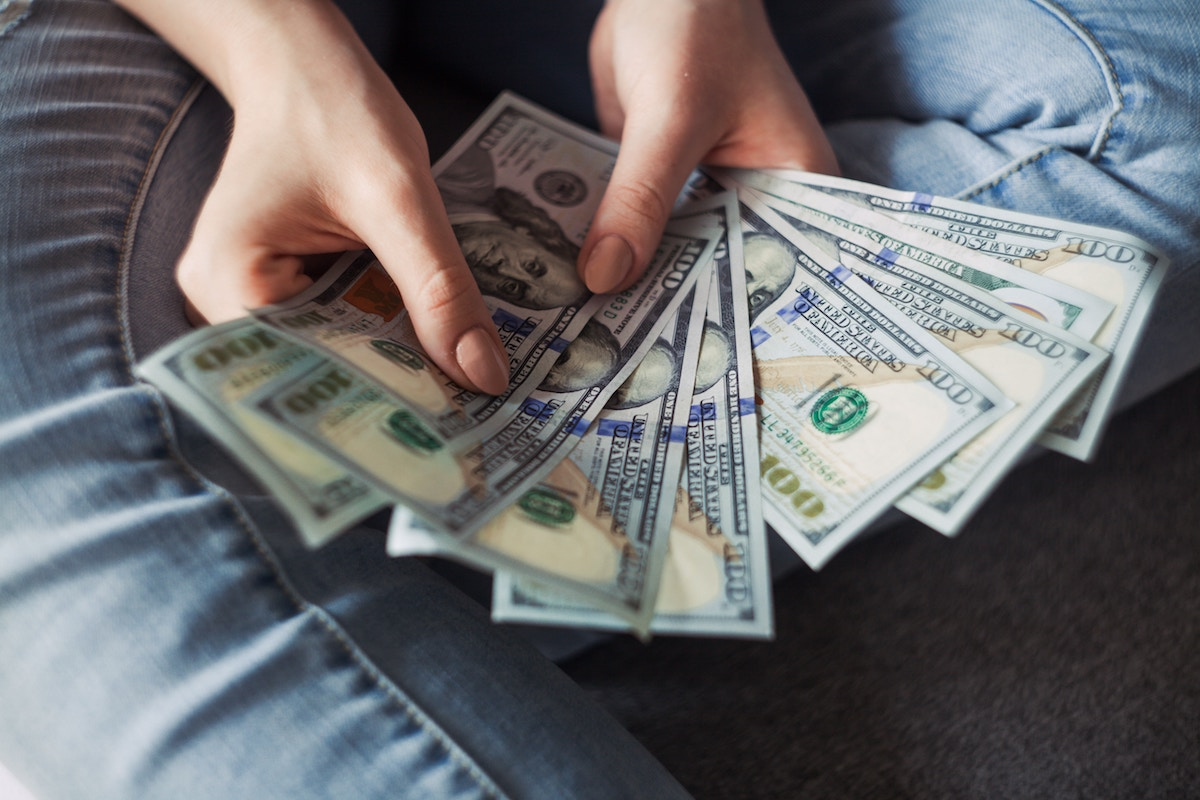

we are going to solve aclassification problem using decision tree algorithm

if your data is little complex draw  decision boundary using logistic regression is difficult 

to solve the problem  have to split your data set again and again to come up with the decision boundries

In [9]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("company.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [16]:
# independant variable 
inputs = df.drop("salary_more_then_100k" ,axis = "columns")
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [18]:
# depentant variable 
target = df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [31]:
# using label encoder
from sklearn.preprocessing import LabelEncoder
# create 3 differant object 
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [20]:
# craete new columns
# call fit and transform method
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [21]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [22]:
# drop columns
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [23]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [24]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [32]:
# import the tree from sklearn
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [26]:
# train the model
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [27]:
model.score(inputs_n,target)

1.0

In [30]:
#Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?
model.predict([[2,1,0]])

C:\Users\Amr mohamed\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [29]:
#Is salary of Google, Computer Engineer, Masters degree > 100 k ?
model.predict([[2,1,1]])

C:\Users\Amr mohamed\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)